### Data Dictionary

Licensee: Represents the entity holding the wagering license.

Fiscal Year: Indicates the fiscal year of the financial data.

Month Ending: Represents the end date of the month for which the financial data is reported.

Wagers: The total amount of money wagered.

Patron Winnings: The total amount paid out to patrons as winnings.

Cancelled Wagers: The amount of wagers that were cancelled.

Monthly Resettlements (3): Wagers where the original settled result was modified due to an error or change in the result of the underlying event.

Online Sports Wagering Win/(Loss): Net win or loss from online sports wagering.

Federal Excise Tax (4): Federal excise tax, calculated as 0.25% of net wagers.

Unadjusted Monthly Gaming Revenue: Gross gaming revenue before any adjustments.

Promotional Coupons or Credits Wagered (5): Amount of coupons and credits issued for use in gaming and redeemed in the state.

Promotional Deduction (6): Deduction from sports wagering win/loss for promotional activities. It is limited by law.

Total Gross Gaming Revenue: The total revenue from gaming after all adjustments and deductions.

Payment (7): The monthly payment to the state, calculated as 13.75% of the gross gaming revenue. The greater of the calculated payment or $0 is the actual payment.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("Selected_Online_Sport_Wagering_Data_new.csv")

### Basic Data Exploration

In [3]:
df.head()

,Licensee,Fiscal Year,Month Ending,Wagers,Patron Winnings,Cancelled Wagers,Monthly Resettlements (3),Online Sports Wagering Win/(Loss),Federal Excise Tax (4),Unadjusted Monthly Gaming Revenue,Promotional Coupons or Credits Wagered (5),Promotional Deduction (6),Total Gross Gaming Revenue,Payment (7),Notes
0,"MPI Master Wagering License CT, LLC",2023/2024,11/30/2023 12:00:00 AM,89381255,84169689,114908,27868,5068789,217575,4851214,1917728,727682,4123532,566986,NaN
1,"Mohegan Digital, LLC",2023/2024,11/30/2023 12:00:00 AM,90463673,84251304,158436,-15120,6069052,220025,5849027,2295276,877354,4971673,683605,NaN
2,CT Lottery Corp,2023/2024,11/30/2023 12:00:00 AM,12738162,11904139,18079,4814,811131,31800,779330,209498,116900,662431,91084,NaN
3,"MPI Master Wagering License CT, LLC",2023/2024,10/31/2023 12:00:00 AM,88261046,80492445,159833,-16787,7625553,212331,7413222,2517905,1111983,6301239,866420,NaN
4,"Mohegan Digital, LLC",2023/2024,10/31/2023 12:00:00 AM,75578037,66242159,114432,51957,9169489,181797,8987693,2744995,1348154,7639539,1050437,NaN


In [4]:
df.shape

(78, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Licensee                                    78 non-null     object
 1   Fiscal Year                                 78 non-null     object
 2   Month Ending                                78 non-null     object
 3   Wagers                                      78 non-null     int64 
 4   Patron Winnings                             78 non-null     int64 
 5   Cancelled Wagers                            78 non-null     int64 
 6   Monthly Resettlements (3)                   78 non-null     int64 
 7   Online Sports Wagering Win/(Loss)           78 non-null     int64 
 8   Federal Excise Tax (4)                      78 non-null     int64 
 9   Unadjusted Monthly Gaming Revenue           78 non-null     int64 
 10  Promotional Coupons or Credi

In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Licensee,78,3,"MPI Master Wagering License CT, LLC",26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiscal Year,78,3,2022/2023,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month Ending,78,26,11/30/2023 12:00:00 AM,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wagers,78.0,NaN,NaN,NaN,40968856.128205,25002100.542595,3246536.0,13657418.75,41107480.5,61863642.5,90463673.0
Patron Winnings,78.0,NaN,NaN,NaN,36956971.5,22597263.637318,2901339.0,12752343.0,37131072.0,57554117.5,84251304.0
Cancelled Wagers,78.0,NaN,NaN,NaN,177219.153846,165571.129664,11400.0,53447.0,143887.5,223295.25,888312.0
Monthly Resettlements (3),78.0,NaN,NaN,NaN,24455.307692,69081.560316,-264510.0,78.5,10434.0,46295.75,370199.0
Online Sports Wagering Win/(Loss),78.0,NaN,NaN,NaN,3810210.0,2725591.803082,293732.0,953900.25,3534157.0,6031000.5,9529961.0
Federal Excise Tax (4),78.0,NaN,NaN,NaN,99249.294872,60203.18008,8013.0,34005.5,99445.5,150766.5,220025.0
Unadjusted Monthly Gaming Revenue,78.0,NaN,NaN,NaN,3710960.75641,2673983.037388,285720.0,926116.0,3395367.5,5823619.75,9348489.0


In [7]:
# Check for Duplicates
dups  = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Licensee,Fiscal Year,Month Ending,Wagers,Patron Winnings,Cancelled Wagers,Monthly Resettlements (3),Online Sports Wagering Win/(Loss),Federal Excise Tax (4),Unadjusted Monthly Gaming Revenue,Promotional Coupons or Credits Wagered (5),Promotional Deduction (6),Total Gross Gaming Revenue,Payment (7),Notes


In [8]:
#Check for missing value
df.isnull().sum()

Licensee                                       0
Fiscal Year                                    0
Month Ending                                   0
Wagers                                         0
Patron Winnings                                0
Cancelled Wagers                               0
Monthly Resettlements (3)                      0
Online Sports Wagering Win/(Loss)              0
Federal Excise Tax (4)                         0
Unadjusted Monthly Gaming Revenue              0
Promotional Coupons or Credits Wagered (5)     0
Promotional Deduction (6)                      0
Total Gross Gaming Revenue                     0
Payment (7)                                    0
Notes                                         71
dtype: int64

In [9]:
#dropping the column Noted
df.drop( 'Notes', axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Licensee                                    78 non-null     object
 1   Fiscal Year                                 78 non-null     object
 2   Month Ending                                78 non-null     object
 3   Wagers                                      78 non-null     int64 
 4   Patron Winnings                             78 non-null     int64 
 5   Cancelled Wagers                            78 non-null     int64 
 6   Monthly Resettlements (3)                   78 non-null     int64 
 7   Online Sports Wagering Win/(Loss)           78 non-null     int64 
 8   Federal Excise Tax (4)                      78 non-null     int64 
 9   Unadjusted Monthly Gaming Revenue           78 non-null     int64 
 10  Promotional Coupons or Credi

### Visualization

In [11]:
df.corr()

,Wagers,Patron Winnings,Cancelled Wagers,Monthly Resettlements (3),Online Sports Wagering Win/(Loss),Federal Excise Tax (4),Unadjusted Monthly Gaming Revenue,Promotional Coupons or Credits Wagered (5),Promotional Deduction (6),Total Gross Gaming Revenue,Payment (7)
Wagers,1.000000,0.998088,0.497780,0.120548,0.864871,0.999770,0.859055,0.799365,0.805730,0.860883,0.860883
Patron Winnings,0.998088,1.000000,0.481000,0.124583,0.832406,0.998412,0.825993,0.784165,0.772292,0.828373,0.828373
Cancelled Wagers,0.497780,0.481000,1.000000,0.126764,0.514365,0.494808,0.513152,0.321830,0.512350,0.506299,0.506299
Monthly Resettlements (3),0.120548,0.124583,0.126764,1.000000,0.039865,0.124066,0.037841,-0.036097,0.018887,0.042170,0.042170
Online Sports Wagering Win/(Loss),0.864871,0.832406,0.514365,0.039865,1.000000,0.860171,0.999934,0.812677,0.956537,0.997285,0.997285
Federal Excise Tax (4),0.999770,0.998412,0.494808,0.124066,0.860171,1.000000,0.854258,0.787316,0.798483,0.856780,0.856780
Unadjusted Monthly Gaming Revenue,0.859055,0.825993,0.513152,0.037841,0.999934,0.854258,1.000000,0.810636,0.957022,0.997243,0.997243
Promotional Coupons or Credits Wagered (5),0.799365,0.784165,0.321830,-0.036097,0.812677,0.787316,0.810636,1.000000,0.833592,0.793612,0.793612
Promotional Deduction (6),0.805730,0.772292,0.512350,0.018887,0.956537,0.798483,0.957022,0.833592,1.000000,0.932861,0.932861
Total Gross Gaming Revenue,0.860883,0.828373,0.506299,0.042170,0.997285,0.856780,0.997243,0.793612,0.932861,1.000000,1.000000


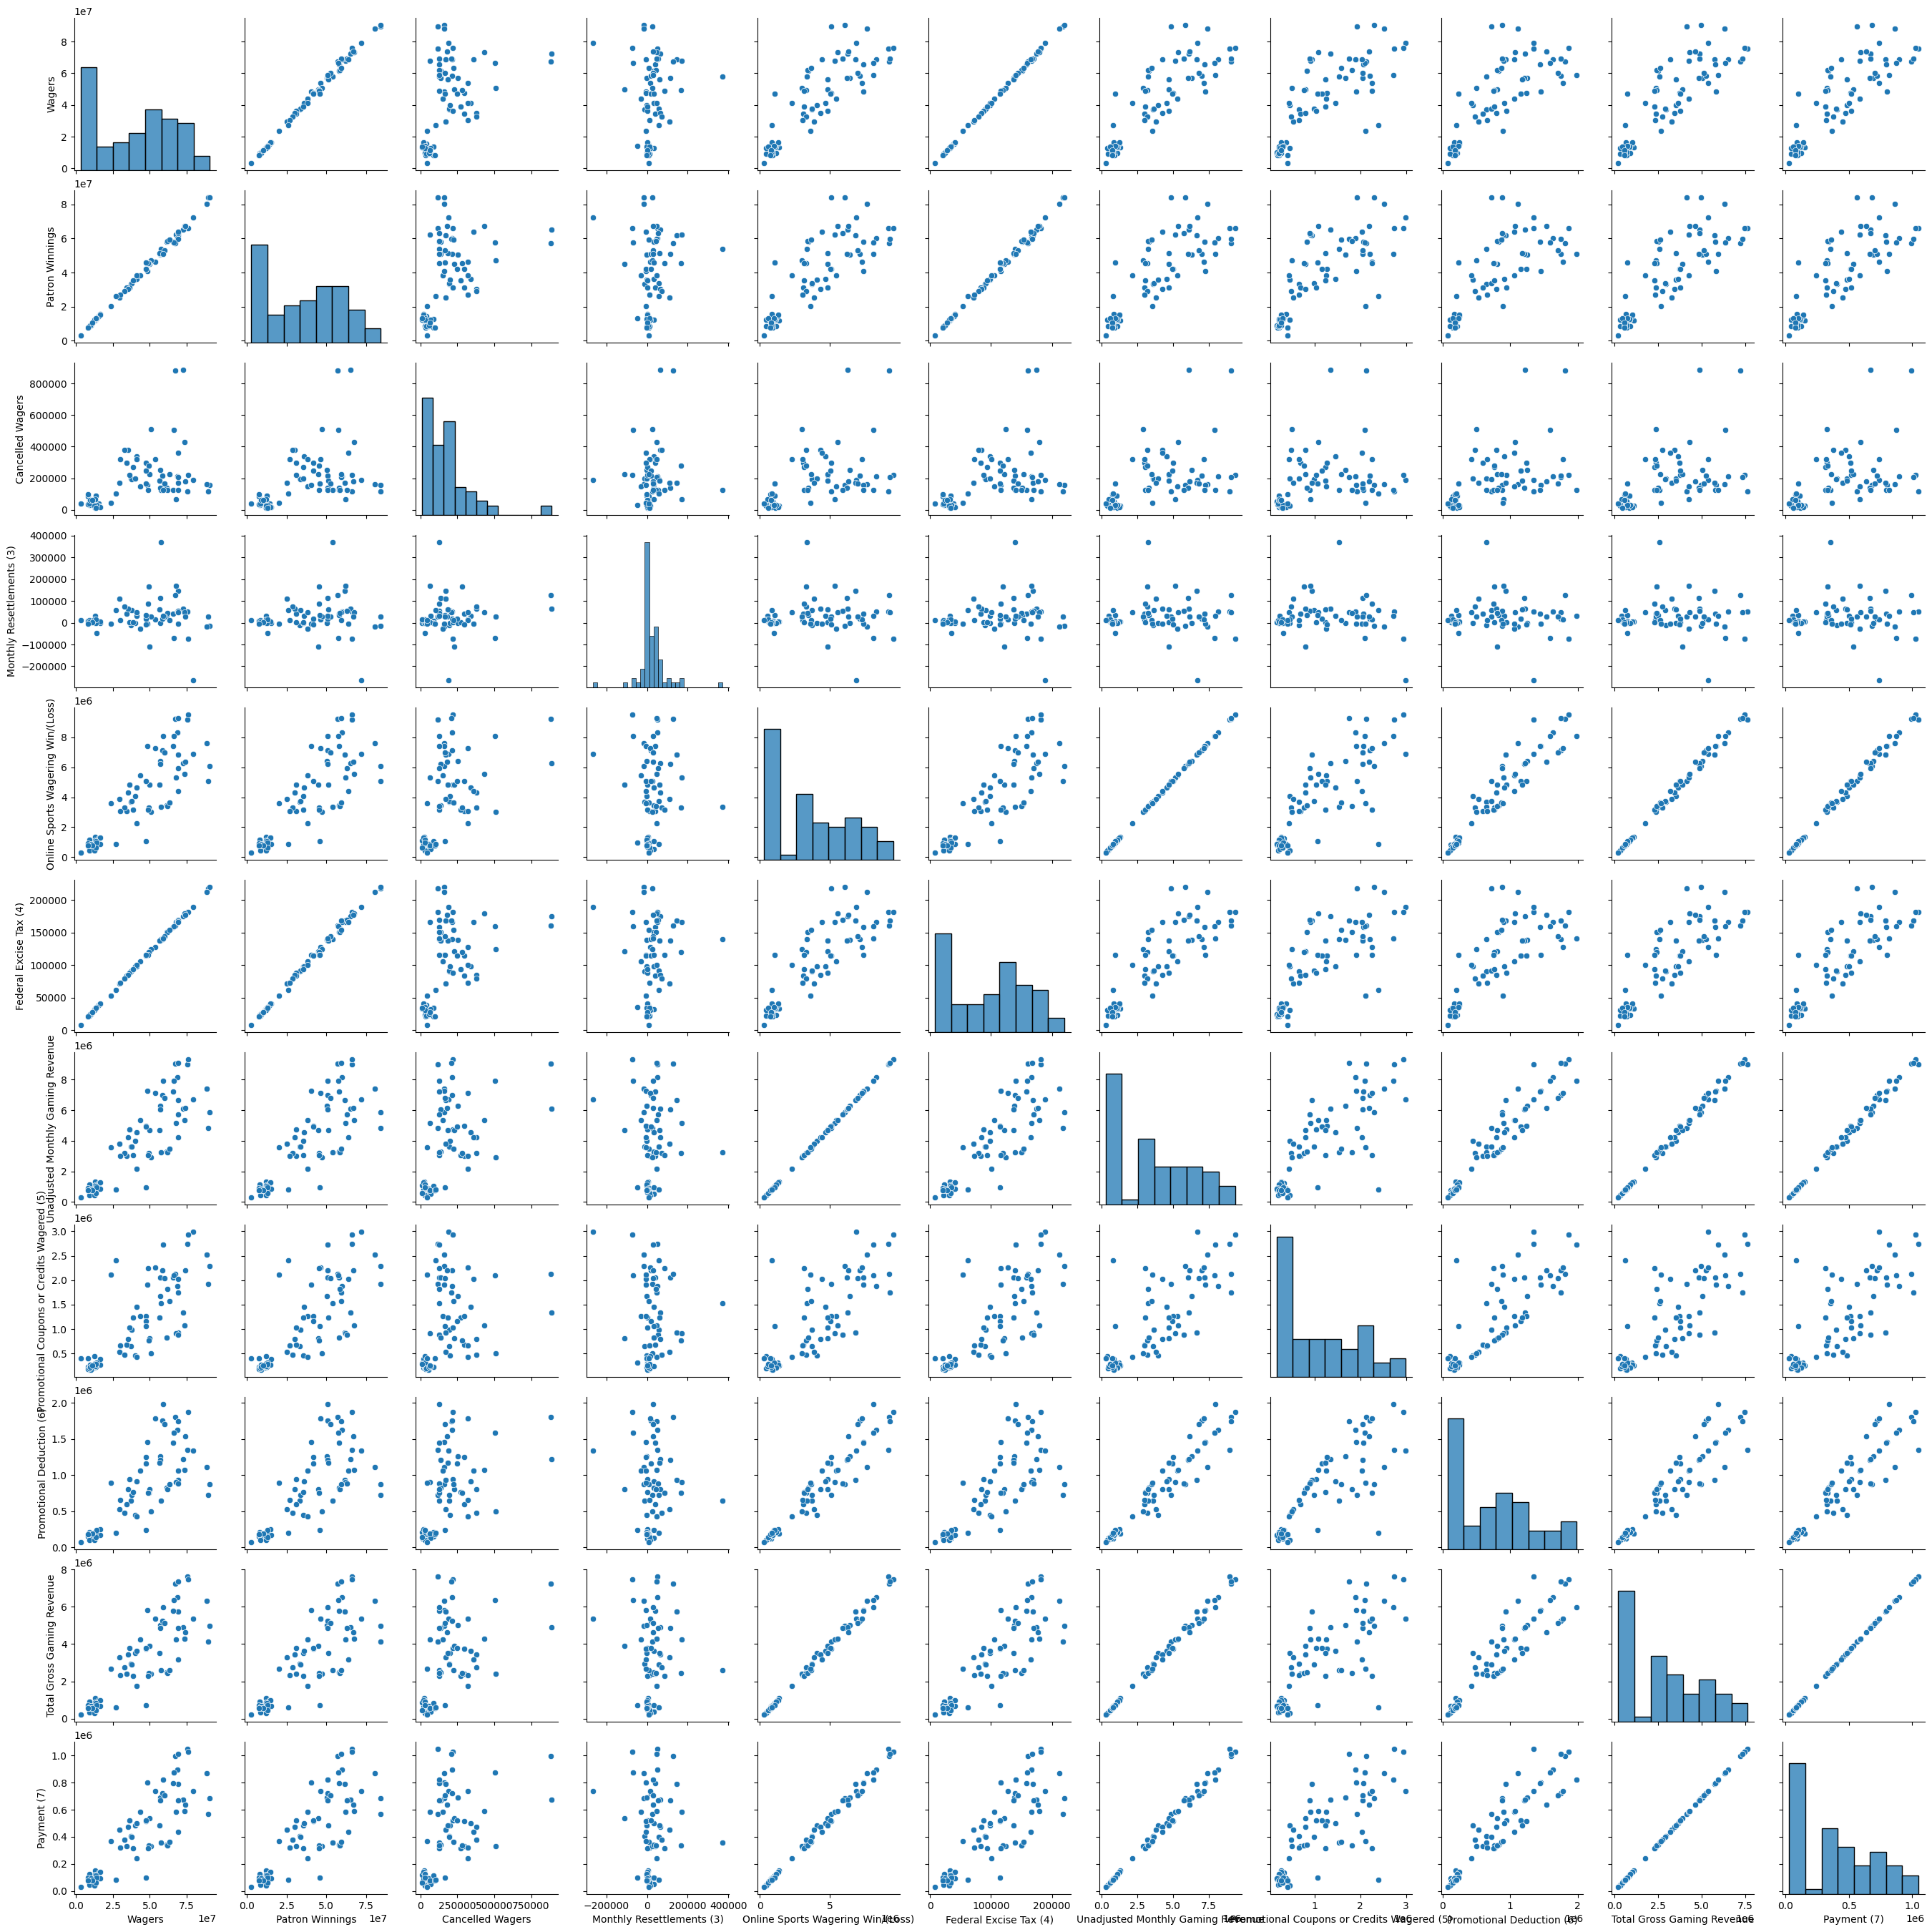

In [12]:
sns.pairplot(df)
plt.show()

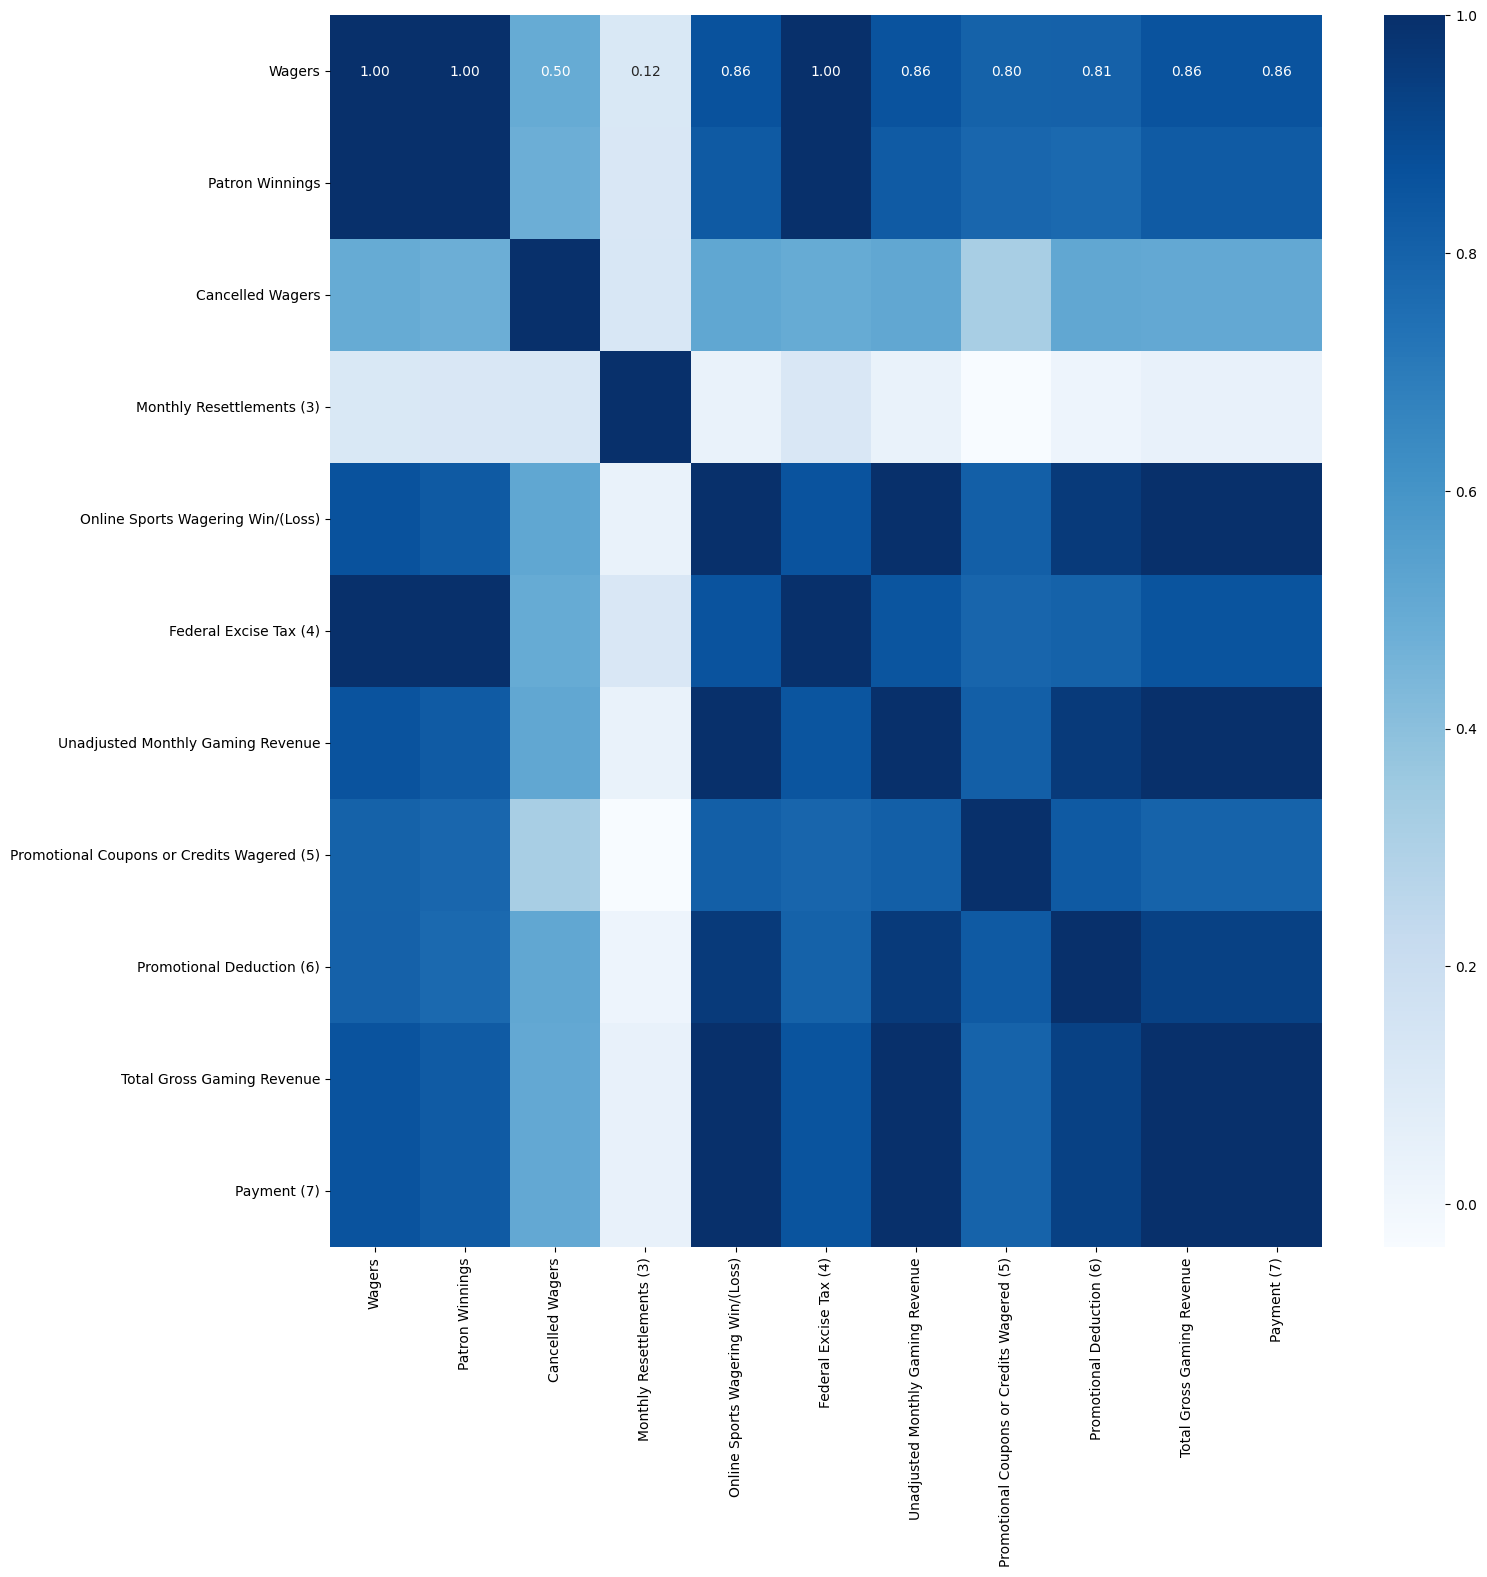

In [13]:
#Correlation Heatmap
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot=True, fmt= '.2f', cmap= 'Blues')
plt.show()

In [14]:
#Label Encoding the column "Licensee"
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Licensee_encoded'] = label_encoder.fit_transform(df['Licensee'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Licensee                                    78 non-null     object
 1   Fiscal Year                                 78 non-null     object
 2   Month Ending                                78 non-null     object
 3   Wagers                                      78 non-null     int64 
 4   Patron Winnings                             78 non-null     int64 
 5   Cancelled Wagers                            78 non-null     int64 
 6   Monthly Resettlements (3)                   78 non-null     int64 
 7   Online Sports Wagering Win/(Loss)           78 non-null     int64 
 8   Federal Excise Tax (4)                      78 non-null     int64 
 9   Unadjusted Monthly Gaming Revenue           78 non-null     int64 
 10  Promotional Coupons or Credi

In [16]:
df['Month_Ending_Year'] = pd.to_datetime(df['Month Ending']).dt.year
df['Month_Ending_Month'] = pd.to_datetime(df['Month Ending']).dt.month

In [17]:
df['Month_Ending_Quarter'] = pd.to_datetime(df['Month Ending']).dt.quarter


In [18]:
df.head()

,Licensee,Fiscal Year,Month Ending,Wagers,Patron Winnings,Cancelled Wagers,Monthly Resettlements (3),Online Sports Wagering Win/(Loss),Federal Excise Tax (4),Unadjusted Monthly Gaming Revenue,Promotional Coupons or Credits Wagered (5),Promotional Deduction (6),Total Gross Gaming Revenue,Payment (7),Licensee_encoded,Month_Ending_Year,Month_Ending_Month,Month_Ending_Quarter
0,"MPI Master Wagering License CT, LLC",2023/2024,11/30/2023 12:00:00 AM,89381255,84169689,114908,27868,5068789,217575,4851214,1917728,727682,4123532,566986,1,2023,11,4
1,"Mohegan Digital, LLC",2023/2024,11/30/2023 12:00:00 AM,90463673,84251304,158436,-15120,6069052,220025,5849027,2295276,877354,4971673,683605,2,2023,11,4
2,CT Lottery Corp,2023/2024,11/30/2023 12:00:00 AM,12738162,11904139,18079,4814,811131,31800,779330,209498,116900,662431,91084,0,2023,11,4
3,"MPI Master Wagering License CT, LLC",2023/2024,10/31/2023 12:00:00 AM,88261046,80492445,159833,-16787,7625553,212331,7413222,2517905,1111983,6301239,866420,1,2023,10,4
4,"Mohegan Digital, LLC",2023/2024,10/31/2023 12:00:00 AM,75578037,66242159,114432,51957,9169489,181797,8987693,2744995,1348154,7639539,1050437,2,2023,10,4


In [19]:
df['Fiscal_Start_Year'] = df['Fiscal Year'].apply(lambda x: int(x.split('/')[0]))


In [20]:
df['Fiscal_End_Year'] = df['Fiscal Year'].apply(lambda x: int(x.split('/')[1]))


In [21]:
df['Fiscal_Year_Duration'] = df['Fiscal_End_Year'] - df['Fiscal_Start_Year'] + 1


In [22]:
df['Fiscal_Year_Category'] = df['Fiscal Year'].astype('category').cat.codes


In [23]:
df.head()

,Licensee,Fiscal Year,Month Ending,Wagers,Patron Winnings,Cancelled Wagers,Monthly Resettlements (3),Online Sports Wagering Win/(Loss),Federal Excise Tax (4),Unadjusted Monthly Gaming Revenue,...,Total Gross Gaming Revenue,Payment (7),Licensee_encoded,Month_Ending_Year,Month_Ending_Month,Month_Ending_Quarter,Fiscal_Start_Year,Fiscal_End_Year,Fiscal_Year_Duration,Fiscal_Year_Category
0,"MPI Master Wagering License CT, LLC",2023/2024,11/30/2023 12:00:00 AM,89381255,84169689,114908,27868,5068789,217575,4851214,...,4123532,566986,1,2023,11,4,2023,2024,2,2
1,"Mohegan Digital, LLC",2023/2024,11/30/2023 12:00:00 AM,90463673,84251304,158436,-15120,6069052,220025,5849027,...,4971673,683605,2,2023,11,4,2023,2024,2,2
2,CT Lottery Corp,2023/2024,11/30/2023 12:00:00 AM,12738162,11904139,18079,4814,811131,31800,779330,...,662431,91084,0,2023,11,4,2023,2024,2,2
3,"MPI Master Wagering License CT, LLC",2023/2024,10/31/2023 12:00:00 AM,88261046,80492445,159833,-16787,7625553,212331,7413222,...,6301239,866420,1,2023,10,4,2023,2024,2,2
4,"Mohegan Digital, LLC",2023/2024,10/31/2023 12:00:00 AM,75578037,66242159,114432,51957,9169489,181797,8987693,...,7639539,1050437,2,2023,10,4,2023,2024,2,2


In [24]:
df['Resettlements_Percentage'] = df['Monthly Resettlements (3)'] / df['Total Gross Gaming Revenue'] * 100


In [25]:
df['Net_Gaming_Revenue'] = df['Total Gross Gaming Revenue'] - df['Monthly Resettlements (3)']


In [26]:
df['Win_Loss_Ratio'] = df['Online Sports Wagering Win/(Loss)'] / df['Wagers']


In [27]:
df['Promotion_Efficiency'] = df['Promotional Deduction (6)'] / df['Promotional Coupons or Credits Wagered (5)']


In [28]:
df['Net_Payment'] = df['Payment (7)'] - df['Federal Excise Tax (4)']


In [29]:
df['Revenue_Per_Wager'] = df['Total Gross Gaming Revenue'] / df['Wagers']


In [30]:
df['Interaction_Feature'] = df['Monthly Resettlements (3)'] * df['Online Sports Wagering Win/(Loss)']


In [31]:
df.head()

,Licensee,Fiscal Year,Month Ending,Wagers,Patron Winnings,Cancelled Wagers,Monthly Resettlements (3),Online Sports Wagering Win/(Loss),Federal Excise Tax (4),Unadjusted Monthly Gaming Revenue,...,Fiscal_End_Year,Fiscal_Year_Duration,Fiscal_Year_Category,Resettlements_Percentage,Net_Gaming_Revenue,Win_Loss_Ratio,Promotion_Efficiency,Net_Payment,Revenue_Per_Wager,Interaction_Feature
0,"MPI Master Wagering License CT, LLC",2023/2024,11/30/2023 12:00:00 AM,89381255,84169689,114908,27868,5068789,217575,4851214,...,2024,2,2,0.675828,4095664,0.056710,0.379450,349411,0.046134,141257011852
1,"Mohegan Digital, LLC",2023/2024,11/30/2023 12:00:00 AM,90463673,84251304,158436,-15120,6069052,220025,5849027,...,2024,2,2,-0.304123,4986793,0.067088,0.382243,463580,0.054958,-91764066240
2,CT Lottery Corp,2023/2024,11/30/2023 12:00:00 AM,12738162,11904139,18079,4814,811131,31800,779330,...,2024,2,2,0.726717,657617,0.063677,0.558001,59284,0.052004,3904784634
3,"MPI Master Wagering License CT, LLC",2023/2024,10/31/2023 12:00:00 AM,88261046,80492445,159833,-16787,7625553,212331,7413222,...,2024,2,2,-0.266408,6318026,0.086398,0.441630,654089,0.071393,-128010158211
4,"Mohegan Digital, LLC",2023/2024,10/31/2023 12:00:00 AM,75578037,66242159,114432,51957,9169489,181797,8987693,...,2024,2,2,0.680106,7587582,0.121325,0.491132,868640,0.101081,476419139973


In [32]:
# Select numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Display the list of numerical columns
print("Numerical Columns:")
print(num_cols)

Numerical Columns:
Index(['Wagers', 'Patron Winnings', 'Cancelled Wagers',
       'Monthly Resettlements (3)', 'Online Sports Wagering Win/(Loss)',
       'Federal Excise Tax (4)', 'Unadjusted Monthly Gaming Revenue',
       'Promotional Coupons or Credits Wagered (5)',
       'Promotional Deduction (6)', 'Total Gross Gaming Revenue',
       'Payment (7)', 'Licensee_encoded', 'Month_Ending_Year',
       'Month_Ending_Month', 'Month_Ending_Quarter', 'Fiscal_Start_Year',
       'Fiscal_End_Year', 'Fiscal_Year_Duration', 'Fiscal_Year_Category',
       'Resettlements_Percentage', 'Net_Gaming_Revenue', 'Win_Loss_Ratio',
       'Promotion_Efficiency', 'Net_Payment', 'Revenue_Per_Wager',
       'Interaction_Feature'],
      dtype='object')


In [35]:
num_df = df[num_cols]

In [36]:
num_df.head()

,Wagers,Patron Winnings,Cancelled Wagers,Monthly Resettlements (3),Online Sports Wagering Win/(Loss),Federal Excise Tax (4),Unadjusted Monthly Gaming Revenue,Promotional Coupons or Credits Wagered (5),Promotional Deduction (6),Total Gross Gaming Revenue,...,Fiscal_End_Year,Fiscal_Year_Duration,Fiscal_Year_Category,Resettlements_Percentage,Net_Gaming_Revenue,Win_Loss_Ratio,Promotion_Efficiency,Net_Payment,Revenue_Per_Wager,Interaction_Feature
0,89381255,84169689,114908,27868,5068789,217575,4851214,1917728,727682,4123532,...,2024,2,2,0.675828,4095664,0.056710,0.379450,349411,0.046134,141257011852
1,90463673,84251304,158436,-15120,6069052,220025,5849027,2295276,877354,4971673,...,2024,2,2,-0.304123,4986793,0.067088,0.382243,463580,0.054958,-91764066240
2,12738162,11904139,18079,4814,811131,31800,779330,209498,116900,662431,...,2024,2,2,0.726717,657617,0.063677,0.558001,59284,0.052004,3904784634
3,88261046,80492445,159833,-16787,7625553,212331,7413222,2517905,1111983,6301239,...,2024,2,2,-0.266408,6318026,0.086398,0.441630,654089,0.071393,-128010158211
4,75578037,66242159,114432,51957,9169489,181797,8987693,2744995,1348154,7639539,...,2024,2,2,0.680106,7587582,0.121325,0.491132,868640,0.101081,476419139973


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [38]:
target_column = 'Total Gross Gaming Revenue'

In [39]:
# Split the data into features (X) and target variable (y)
X = num_df.drop(target_column, axis=1)
y = num_df[target_column]

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Decision Trees
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [43]:
# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [45]:
# Predictions
linear_reg_preds = linear_reg_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)

In [46]:
# Evaluate the models (using Mean Squared Error for simplicity)
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
decision_tree_mse = mean_squared_error(y_test, decision_tree_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_preds)


In [47]:
# Display Mean Squared Error for each model
print(f"Linear Regression MSE: {linear_reg_mse}")
print(f"Decision Trees MSE: {decision_tree_mse}")
print(f"Random Forest MSE: {random_forest_mse}")
print(f"Gradient Boosting MSE: {gradient_boosting_mse}")

Linear Regression MSE: 3.179966665965879e-15
Decision Trees MSE: 37043677838.5
Random Forest MSE: 36118567454.376526
Gradient Boosting MSE: 18589841404.887302


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you already have the predictions (linear_reg_preds, decision_tree_preds, random_forest_preds, gradient_boosting_preds)

# Calculate metrics for Linear Regression
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_reg_r2 = r2_score(y_test, linear_reg_preds)

# Calculate metrics for Decision Trees
decision_tree_mse = mean_squared_error(y_test, decision_tree_preds)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_preds)
decision_tree_r2 = r2_score(y_test, decision_tree_preds)

# Calculate metrics for Random Forest
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)

# Calculate metrics for Gradient Boosting
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_preds)
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_preds)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_preds)

# Print metrics for all models
print("Linear Regression Metrics:")
print(f"MSE: {linear_reg_mse}")
print(f"MAE: {linear_reg_mae}")
print(f"R-squared: {linear_reg_r2}")
print("\n")

print("Decision Trees Metrics:")
print(f"MSE: {decision_tree_mse}")
print(f"MAE: {decision_tree_mae}")
print(f"R-squared: {decision_tree_r2}")
print("\n")

print("Random Forest Metrics:")
print(f"MSE: {random_forest_mse}")
print(f"MAE: {random_forest_mae}")
print(f"R-squared: {random_forest_r2}")
print("\n")

print("Gradient Boosting Metrics:")
print(f"MSE: {gradient_boosting_mse}")
print(f"MAE: {gradient_boosting_mae}")
print(f"R-squared: {gradient_boosting_r2}")


Linear Regression Metrics:
MSE: 3.179966665965879e-15
MAE: 4.0192389860749245e-08
R-squared: 1.0


Decision Trees Metrics:
MSE: 37043677838.5
MAE: 140616.875
R-squared: 0.9890120868760002


Random Forest Metrics:
MSE: 36118567454.376526
MAE: 147263.8268749999
R-squared: 0.9892864935527663


Gradient Boosting Metrics:
MSE: 18589841404.887302
MAE: 106480.97305007343
R-squared: 0.994485872508762


**Considering these metrics, Gradient Boosting seems to perform the best among the models evaluated. It achieves a good balance between accuracy and generalization.**